<a href="https://colab.research.google.com/github/DaegyuHwang/Deep-Learning/blob/main/CNN_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## #Preprocessing

In [ ]:
## import the dataset
from tensorflow.keras.datasets import mnist

# MNIST data is already splited into train and test group
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# check the number of data in the train and test set
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [ ]:
X_train.shape

(60000, 28, 28)

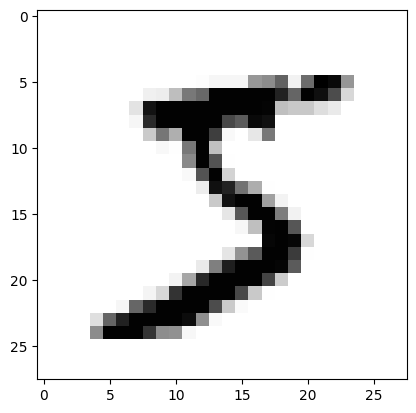

In [ ]:
## show the one image of the data set
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys') # cmap='Greys : making the color as black and white
plt.show()

In [ ]:
print(y_train[0])

5


In [ ]:
## check how the computer recognize the image
# The picture above has 28*28=784 pixcels
# Each pixcel consists of 255 level according to its brightness
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" %i)
  sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
## to train a model, we need to revise the data into 1 dimension
# i.e transform the 28*28 of two dimension data into 784 of one dimension data
# function "reshape": reshape(total number of sample, the number of features for one sample in one dimension)

X_train=X_train.reshape(X_train.shape[0],784)
X_test=X_test.reshape(X_test.shape[0],784)

# notice that "keras" shows the best performance with the data has feature values between 0 to 1; so we are dividing by 255
X_train=X_train.astype('float64')
X_test=X_test.astype('float64')
X_train=X_train/255
X_test=X_test/255

In [ ]:
## one-hot encoding to y;
# 5 -> [0,0,0,0,0,1,0,0,0,0]
# np_utils.to_categorical(class,number of class)
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


60000
10000


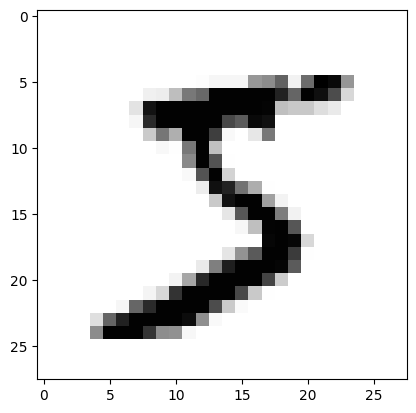

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
## put all process together

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import numpy as np # Import numpy

# save the data set
(X_train,y_train),(X_test,y_test)=mnist.load_data() # Corrected variable name

# confirm the number of data inside the variable
print(X_train.shape[0])
print(X_test.shape[0])

# check the first image
plt.imshow(X_train[0],cmap='Greys')
plt.show()

# check the way how the image is recognized
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s"%i)
  sys.stdout.write("\n")

# tranforming the dimension of the data to make them as usable features
X_train=X_train.reshape(X_train.shape[0],784).astype('float64')/255
X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

# check the value of class of the first image
print("class:", y_train[0])

# classify the result of y
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train[0])

## # constructing Frame

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1: val_loss improved from inf to 0.18254, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18254 to 0.13435, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13435 to 0.10873, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.10873 to 0.10297, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10297 to 0.08808, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.08808 to 0.08360, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss did not improve from 0.08360

Epoch 8: val_loss improved from 0.08360 to 0.08289, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss improved from 0.08289 to 0.07979, saving model to ./MNIST_MLP.keras

Epoch 10: val_loss did not improve from 0.07979

Epoch 11: val_loss did not improve from 0.07979

Epoch 12: val_loss improved from 0.07979 to 0.07943, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss did not improve from 0.07943

Epoch 14: val_loss did n

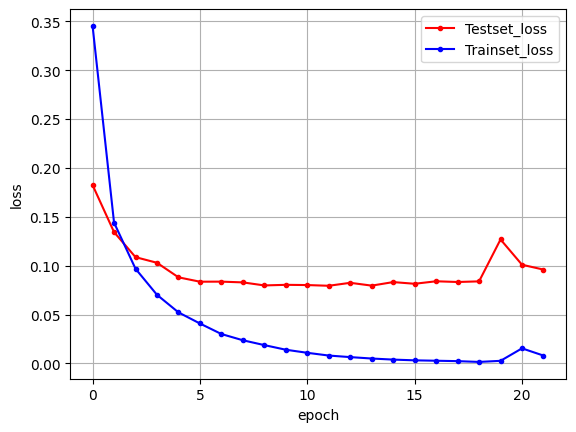

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# save the data set
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# tranforming the dimension of the data to make them as usable features and class
X_train=X_train.reshape(X_train.shape[0],784).astype('float64')/255
X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

# set the frame of model
model=Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# optimize the model
modelpath="./MNIST_MLP.keras"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

# run the model
history=model.fit(X_train, y_train, validation_split=0.25,epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

# print the accuracy
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test,y_test)[1]))

# save the loss to plot
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

# plot the graph
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend()

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0995


[0.07951543480157852, 0.9790999889373779]

In [ ]:
## Compare the accuracy of saved model with the last model
from tensorflow.keras.models import load_model

# Now, load the best model from the saved file
best_model = load_model(modelpath)

# Evaluate the best model on the test set
score_best_model = best_model.evaluate(X_test, y_test)
last_model = model.evaluate(X_test,y_test)
print(score_best_model)
print(last_model)

# the least loss validation model may not perform better than the last model, of course.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0768
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0995
[0.06414570659399033, 0.9811999797821045]
[0.07951543480157852, 0.9790999889373779]


## #Convolutional Neural Network (CNN)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.07569, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.07569 to 0.05634, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05634 to 0.04806, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04806 to 0.04584, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04584 to 0.04330, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04330 to 0.04277, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04277 to 0.04187, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss did not improve from 0.04187

Epoch 9: val_loss improved from 0.04187 to 0.04153, saving model to ./MNIST_CNN.keras

Epoch 10: val_loss improved from 0.04153 to 0.03898, saving model to ./MNIST_CNN.keras

Epoch 11: val_loss did not improve from 0.03898

Epoch 12: val_loss did not improve from 0.03898

Epoch 13: val_loss improved from 0.03898 to 0.03809, saving model to ./MN

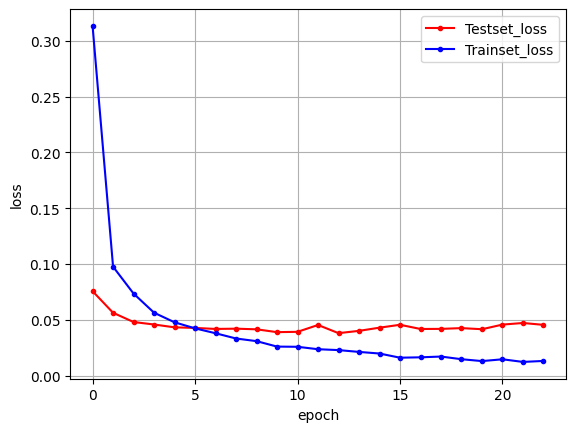

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# save the data set
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float64')/255 # 1 stands for the grayscale(black and white)
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float64')/255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

# set the frame of model # adding convolution layer by using Conv2D funtion
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),activation='relu')) # 1 in the input_shape stands for the grayscale; if it is 3, it means color
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # I used MaxPooling here, can use aveage pooling too
model.add(Dropout(0.25)) # to block the overfitting, turn off 25% nodes in the hidden layers
model.add(Flatten())
model.add(Dense(128,input_dim=784,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

# model running option
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# optimize the model
modelpath="./MNIST_CNN.keras"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

# run the model
history=model.fit(X_train, y_train, validation_split=0.25,epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

# print the accuracy
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test,y_test)[1]))

# save the loss to plot
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

# plot the graph
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend()

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
## Note the accuracy; Compare to the previous deep learning model, this CNN model works well.